<strong>Outliers</strong> can induce the state of confusion in the predictive model, which in turn makes the model very weak for <strong>Decision rules</strong>.

<strong>Outliers</strong> in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bigmart.csv')

In [3]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

# Finding outliers in a data

#### Univariate Outlier

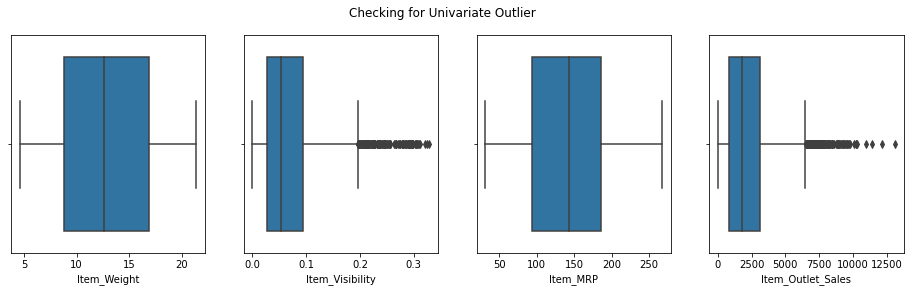

In [4]:
#find univariate outlier

plt.rcParams['figure.figsize'] = (16,4)

plt.subplot(1,4,1)
sns.boxplot(data['Item_Weight'])

plt.subplot(1,4,2)
sns.boxplot(data['Item_Visibility'])

plt.subplot(1,4,3)
sns.boxplot(data['Item_MRP'])


plt.subplot(1,4,4)
sns.boxplot(data['Item_Outlet_Sales'])

plt.suptitle('Checking for Univariate Outlier')
plt.show()

#### Bivariate Outlier

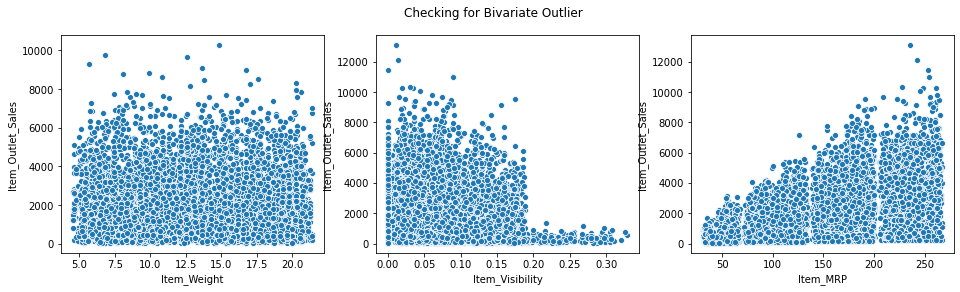

In [5]:
#checking for the bivariate outlier with the target variables

plt.subplot(1,3,1)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_Weight'])

plt.subplot(1,3,2)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_Visibility'])

plt.subplot(1,3,3)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_MRP'])

plt.suptitle('Checking for Bivariate Outlier')
plt.show()

# Using Winsorization to deal with Outliers

<strong>Winsorization</strong> is a way to minimize the influence of outliers in our data by either deleting the extreme observations of our data or by changing the values so that it is close to others values in the set.

The concept of <strong>Winsorization</strong> is based on the concept of <strong>Normal Distribution</strong> where it tries to find out the most uncommon observations and treat them in the most appropriate way.


steps to perform <strong>Winsorization</strong>:
* Analyze the data and try to find out the cause for the outliers in the dataset.
* Decide how much <strong>Winsorization</strong> we want (In general we prefer the <strong>Winsorization</strong> of the top 5% and the bottom 5% of the dataset).

* Replace extreme values by maximum or minimum values.


We have two ways to deal with outliers either by deleting them or by capping them.

We can delete<strong> outliers</strong> in the following cases:
* We are sure that the outliers are due to an entry error or due to measurement error.
* If the outliers create a significant relationship between two independent variables which is against the assumption of many of our ML algorithms.
We can capp<strong> outliers</strong> if they do not fall under the conditions for deleting them.

<strong>Capping outliers</strong> refers to:
* replacing the outliers to a near value so that we can keep the point in our analysis and it also does not skew the data.

<strong>NB:</strong> other than deleting or capping, we can deal with outliers in two more ways.
* <strong>Imputing:</strong> If an outlier seems to be due to some mistake and we recognise the mistake then we can <strong>impute</strong> the value with its mean.
* <strong>Binning:</strong> It is the process of transforming numerical variables into categorical type.

## Capping outliers

In [6]:
#capping the outliers in the column Item_Outlet_Sales having values greater than 10000

data['Item_Outlet_Sales'].values[data['Item_Outlet_Sales'].values > 10000] = 10000

In [7]:
data[data['Item_Outlet_Sales'] > 10000]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

In [8]:
#deal with bivariate outliers
#delete rows greater than 8000

data = data[~(data['Item_Outlet_Sales']>8000)]

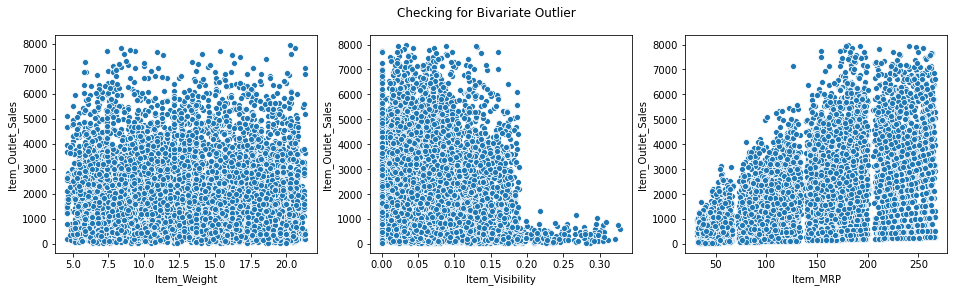

In [9]:
plt.subplot(1,3,1)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_Weight'])

plt.subplot(1,3,2)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_Visibility'])

plt.subplot(1,3,3)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_MRP'])

plt.suptitle('Checking for Bivariate Outlier')
plt.show()